In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('./data/saleshourly.csv', index_col=0, parse_dates=True)

In [7]:
df

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02 08:00:00,0.00,0.67,0.4,2.0,0.0,0.0,0.0,1.0,2014,1,8,Thursday
2014-01-02 09:00:00,0.00,0.00,1.0,0.0,2.0,0.0,0.0,0.0,2014,1,9,Thursday
2014-01-02 10:00:00,0.00,0.00,0.0,3.0,2.0,0.0,0.0,0.0,2014,1,10,Thursday
2014-01-02 11:00:00,0.00,0.00,0.0,2.0,1.0,0.0,0.0,0.0,2014,1,11,Thursday
2014-01-02 12:00:00,0.00,2.00,0.0,5.0,2.0,0.0,0.0,0.0,2014,1,12,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-08 15:00:00,0.00,0.40,0.0,11.3,1.0,0.0,0.0,0.0,2019,10,15,Tuesday
2019-10-08 16:00:00,0.33,0.00,0.0,1.0,2.0,0.0,0.0,0.0,2019,10,16,Tuesday
2019-10-08 17:00:00,0.00,0.00,0.0,1.0,2.0,0.0,1.0,0.0,2019,10,17,Tuesday


In [8]:
df.drop(df.columns[-4:], axis=1, inplace=True)

In [9]:
df

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
datum,,,,,,,,
2014-01-02 08:00:00,0.00,0.67,0.4,2.0,0.0,0.0,0.0,1.0
2014-01-02 09:00:00,0.00,0.00,1.0,0.0,2.0,0.0,0.0,0.0
2014-01-02 10:00:00,0.00,0.00,0.0,3.0,2.0,0.0,0.0,0.0
2014-01-02 11:00:00,0.00,0.00,0.0,2.0,1.0,0.0,0.0,0.0
2014-01-02 12:00:00,0.00,2.00,0.0,5.0,2.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2019-10-08 15:00:00,0.00,0.40,0.0,11.3,1.0,0.0,0.0,0.0
2019-10-08 16:00:00,0.33,0.00,0.0,1.0,2.0,0.0,0.0,0.0
2019-10-08 17:00:00,0.00,0.00,0.0,1.0,2.0,0.0,1.0,0.0


<AxesSubplot:xlabel='datum'>

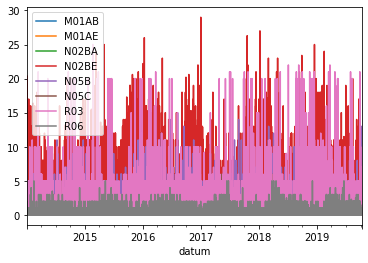

In [4]:
df.plot()

<AxesSubplot:xlabel='datum'>

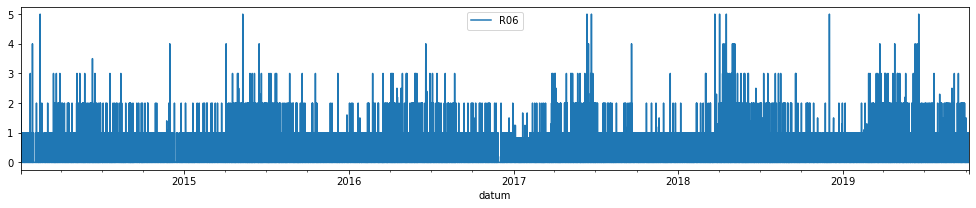

In [11]:
r06 = df[['R06']]
r06.plot(figsize =(17,3))

<AxesSubplot:xlabel='datum'>

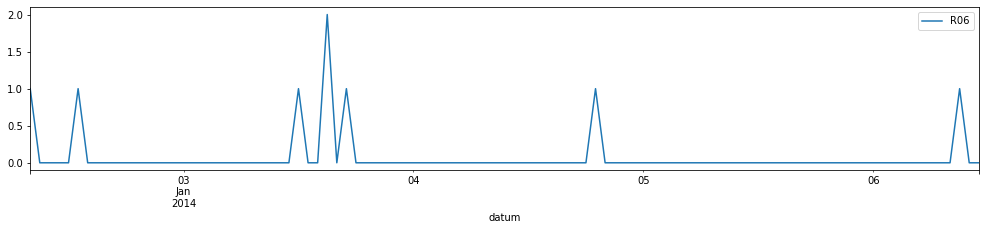

In [12]:
r06.iloc[:100].plot(figsize =(17,3))

<AxesSubplot:xlabel='datum'>

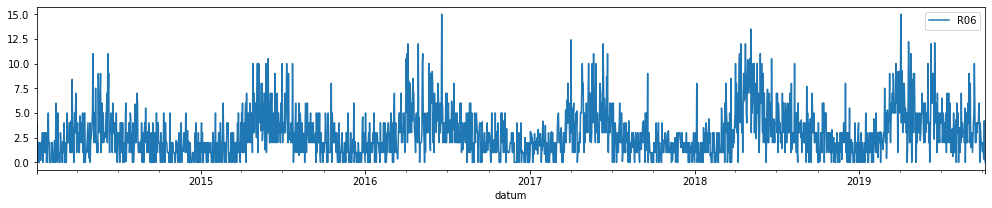

In [18]:
r06_D = r06.resample('D').sum()
r06_D.plot(figsize =(17,3))

<AxesSubplot:xlabel='datum'>

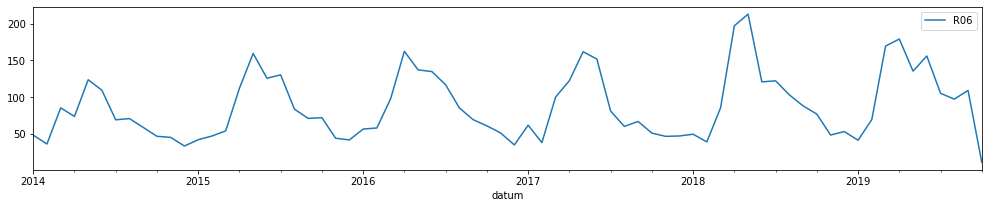

In [109]:
r06_M = r06.resample('M').sum()
r06_M.plot(figsize =(17,3))

In [110]:
r06_M

,R06
datum,
2014-01-31,48.20
2014-02-28,36.20
2014-03-31,85.40
2014-04-30,73.70
2014-05-31,123.70
...,...
2019-06-30,156.04
2019-07-31,105.20
2019-08-31,97.30


In [114]:
r06_M['y1'] = r06_M.R06.shift(-12, freq="M")
r06_M['y2'] = r06_M.R06.shift(-24, freq="M")

<AxesSubplot:xlabel='datum'>

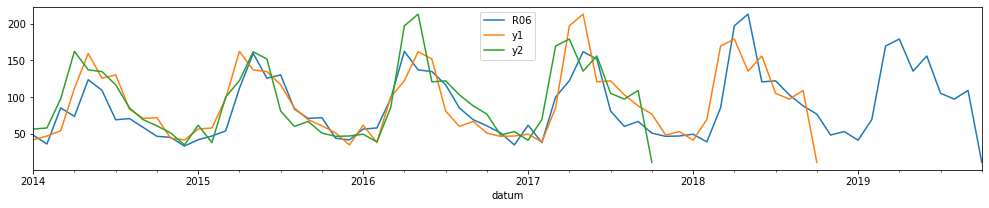

In [115]:
r06_M.plot(figsize =(17,3))

<AxesSubplot:xlabel='datum'>

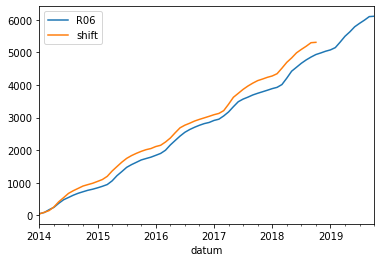

In [22]:
r06_M.cumsum().plot()

In [23]:
r06_Y = r06.resample('Y').sum()
r06_Y

,R06
datum,
2014-12-31,800.4875
2015-12-31,983.0300
2016-12-31,1065.0700
2017-12-31,988.8600
2018-12-31,1196.8000
2019-12-31,1073.5700


In [24]:
dy = r06.resample('Y').agg('min max mean'.split())
dy

R06               
            min  max      mean
datum                         
2014-12-31  0.0  5.0  0.091715
2015-12-31  0.0  5.0  0.112218
2016-12-31  0.0  4.0  0.121251
2017-12-31  0.0  5.0  0.112884
2018-12-31  0.0  5.0  0.136621
2019-12-31  0.0  5.0  0.159283

<AxesSubplot:xlabel='datum'>

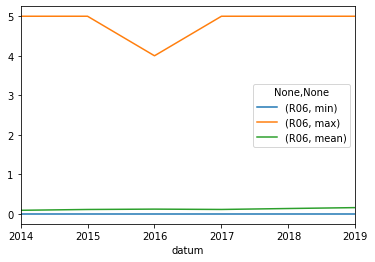

In [25]:
dy.plot()

In [33]:
tst = iter(r06_D.rolling(4,min_periods=4))

In [42]:
next(tst)

,R06
datum,
2014-01-07,0.0
2014-01-08,0.0
2014-01-09,2.0
2014-01-10,2.0


In [43]:
from datetime import timedelta

In [62]:
a = timedelta(days=1)

In [63]:
tst = iter(r06.rolling(a))

In [108]:
next(tst)

,R06
datum,
2014-01-03 05:00:00,0.0
2014-01-03 06:00:00,0.0
2014-01-03 07:00:00,0.0
2014-01-03 08:00:00,0.0
2014-01-03 09:00:00,0.0
2014-01-03 10:00:00,0.0
2014-01-03 11:00:00,0.0
2014-01-03 12:00:00,1.0
2014-01-03 13:00:00,0.0


In [46]:
tst = iter(r06_D.rolling(window='7D', closed='right'))

In [151]:
next(tst)

,R06,alpha=0.01,alpha=0.5,alpha=0.9
datum,,,,
2014-01-02,2.0,2.000000,2.000000,2.000000
2014-01-03,4.0,3.005025,3.333333,3.818182


In [152]:
r06_D.rolling(window='7D', closed='right').max()

,R06,alpha=0.01,alpha=0.5,alpha=0.9
datum,,,,
2014-01-02,2.0,2.000000,2.000000,2.000000
2014-01-03,4.0,3.005025,3.333333,3.818182
2014-01-04,4.0,3.005025,3.333333,3.818182
2014-01-05,4.0,3.005025,3.333333,3.818182
2014-01-06,4.0,3.005025,3.333333,3.818182
...,...,...,...,...
2019-10-04,3.0,3.796077,3.059144,3.064180
2019-10-05,2.1,3.779117,2.579572,2.196418
2019-10-06,4.2,3.761325,2.526090,3.820615


In [153]:
r06_D.rolling(window='7D', closed='left').max()

,R06,alpha=0.01,alpha=0.5,alpha=0.9
datum,,,,
2014-01-02,NaN,NaN,NaN,NaN
2014-01-03,2.0,2.000000,2.000000,2.000000
2014-01-04,4.0,3.005025,3.333333,3.818182
2014-01-05,4.0,3.005025,3.333333,3.818182
2014-01-06,4.0,3.005025,3.333333,3.818182
...,...,...,...,...
2019-10-04,4.0,3.804119,3.118288,3.641800
2019-10-05,3.0,3.796077,3.059144,3.064180
2019-10-06,2.1,3.779117,2.579572,2.196418


In [154]:
r06_D.expanding().count()

,R06,alpha=0.01,alpha=0.5,alpha=0.9
datum,,,,
2014-01-02,1.0,1.0,1.0,1.0
2014-01-03,2.0,2.0,2.0,2.0
2014-01-04,3.0,3.0,3.0,3.0
2014-01-05,4.0,4.0,4.0,4.0
2014-01-06,5.0,5.0,5.0,5.0
...,...,...,...,...
2019-10-04,2102.0,2102.0,2102.0,2102.0
2019-10-05,2103.0,2103.0,2103.0,2103.0
2019-10-06,2104.0,2104.0,2104.0,2104.0


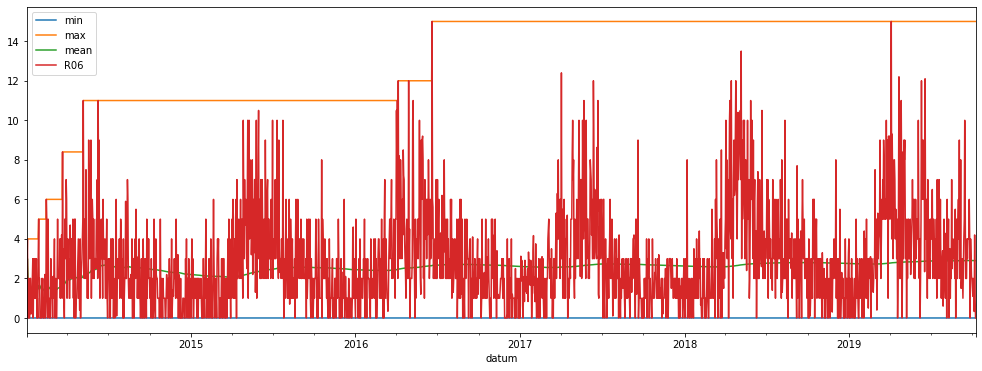

In [162]:
r06_DE = r06_D.R06.expanding().agg('min max mean'.split())
r06_DE['R06'] = r06_D.R06
_ = r06_DE.plot(figsize =(17,6))

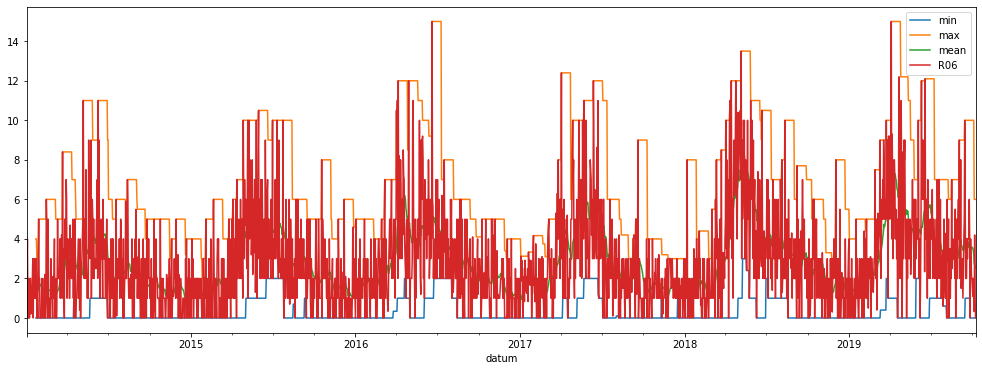

In [167]:
r06_DW = r06_D.R06.rolling(21).agg('min max mean'.split())
r06_DW['R06'] = r06_D.R06
_ = r06_DW.plot(figsize =(17,6))

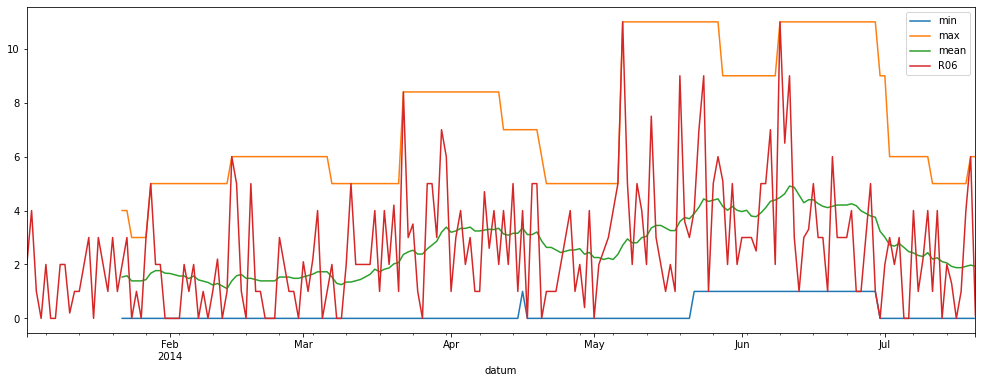

In [166]:
_ = r06_DW.iloc[:200].plot(figsize =(17,6))

<AxesSubplot:xlabel='datum'>

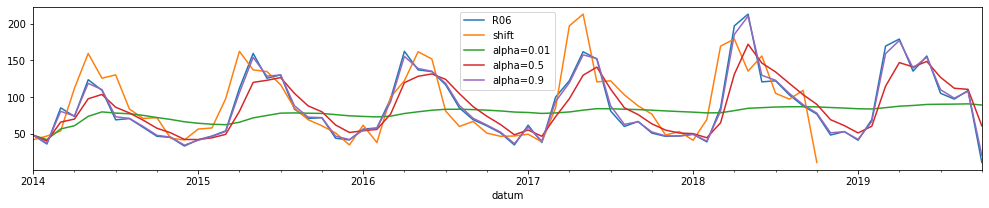

In [84]:
r06_M['alpha=0.01'] = r06_M.R06.ewm(alpha=0.01).mean()
r06_M['alpha=0.5'] = r06_M.R06.ewm(alpha=0.5).mean()
r06_M['alpha=0.9'] = r06_M.R06.ewm(alpha=0.9).mean()
r06_M.plot(figsize =(17,3))

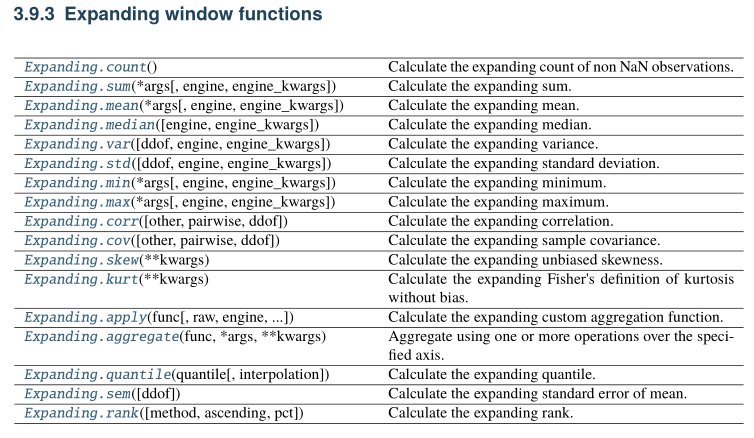